In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
email = pd.read_csv('messages.csv', encoding='latin-1')
email.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [3]:
email.shape

(2893, 3)

In [4]:
email['label'].unique()

array([0, 1], dtype=int64)

In [5]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
subject    2831 non-null object
message    2893 non-null object
label      2893 non-null int64
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [6]:
email.label.value_counts()

0    2412
1     481
Name: label, dtype: int64

In [7]:
print('Spam Ratio ::', round(len(email[email['label']==1])/len(email.label),2)*100,'%')
print('Ham Ratio ::', round(len(email[email['label']==0])/len(email.label),2)*100,'%')

Spam Ratio :: 17.0 %
Ham Ratio :: 83.0 %


In [8]:
email['text'] = (email['subject'].fillna('') + ' ' + email['message'].fillna('')).str.strip()
email.head()

,subject,message,label,text
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research center conten...
1,NaN,"lang classification grimes , joseph e . and ba...",0,"lang classification grimes , joseph e . and ba..."
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...
3,risk,a colleague and i are researching the differin...,0,risk a colleague and i are researching the dif...
4,request book information,earlier this morning i was on the phone with a...,0,request book information earlier this morning ...


In [9]:
email.drop(columns=['subject','message'], axis=1, inplace=True)
email.head()

,label,text
0,0,job posting - apple-iss research center conten...
1,0,"lang classification grimes , joseph e . and ba..."
2,0,query : letter frequencies for text identifica...
3,0,risk a colleague and i are researching the dif...
4,0,request book information earlier this morning ...


In [10]:
email['length']=email.text.str.len()
email.head()

,label,text,length
0,0,job posting - apple-iss research center conten...,2895
1,0,"lang classification grimes , joseph e . and ba...",1799
2,0,query : letter frequencies for text identifica...,1485
3,0,risk a colleague and i are researching the dif...,328
4,0,request book information earlier this morning ...,1070


In [11]:
email['text']=email['text'].str.lower()
email.head()

,label,text,length
0,0,job posting - apple-iss research center conten...,2895
1,0,"lang classification grimes , joseph e . and ba...",1799
2,0,query : letter frequencies for text identifica...,1485
3,0,risk a colleague and i are researching the dif...,328
4,0,request book information earlier this morning ...,1070


In [12]:
# Replace email addresses with 'email'
email['text'] = email['text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

# Replace URLs with 'webaddress'
email['text'] = email['text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

# Replace money symbols with 'moneysymbol' (£ can by typed with ALT key + 156)
email['text'] = email['text'].str.replace(r'£|\$', 'moneysymbol')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
email['text'] = email['text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

# Replace numbers with 'number'
email['text'] = email['text'].str.replace(r'\d+(\.\d+)?', 'number')

# Remove punctuation
email['text'] = email['text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
email['text'] = email['text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
email['text'] = email['text'].str.replace(r'^\s+|\s+?$', '')

In [13]:
email.head()

,label,text,length
0,0,job posting apple iss research center content ...,2895
1,0,lang classification grimes joseph e and barbar...,1799
2,0,query letter frequencies for text identificati...,1485
3,0,risk a colleague and i are researching the dif...,328
4,0,request book information earlier this morning ...,1070


In [14]:
# Remove stop_words
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ur', '4', '2', 'im', 'dont', 'cud', 'wat', 'doin', 'ure', "u're"])

email['text'] = email['text'].apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))

email['new_length'] = email.text.str.len()
email.head()

,label,text,length,new_length
0,0,job posting apple iss research center content ...,2895,2234
1,0,lang classification grimes joseph e barbara f ...,1799,1487
2,0,query letter frequencies text identification p...,1485,1129
3,0,risk colleague researching differing degrees r...,328,215
4,0,request book information earlier morning phone...,1070,654


In [15]:
print('Original text length ::', email['length'].sum())
print('New text length ::', email['new_length'].sum())
print('Total words removed ::', email['length'].sum() - email['new_length'].sum())

Original text length :: 9436344
New text length :: 6957108
Total words removed :: 2479236


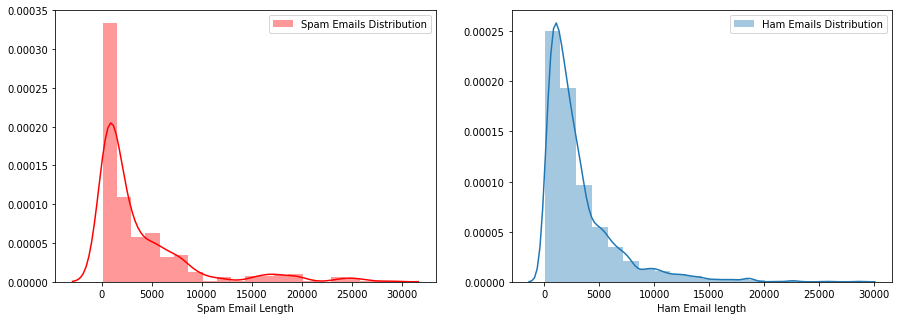

In [16]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,5))
sns.distplot(email[email['label']==1]['length'], bins=20, ax=ax[0], label='Spam Emails Distribution', color='r')
ax[0].set_xlabel('Spam Email Length')
ax[0].legend()

sns.distplot(email[email['label']==0]['length'], bins=20, ax=ax[1], label='Ham Emails Distribution')
ax[1].set_xlabel('Ham Email length')
ax[1].legend()

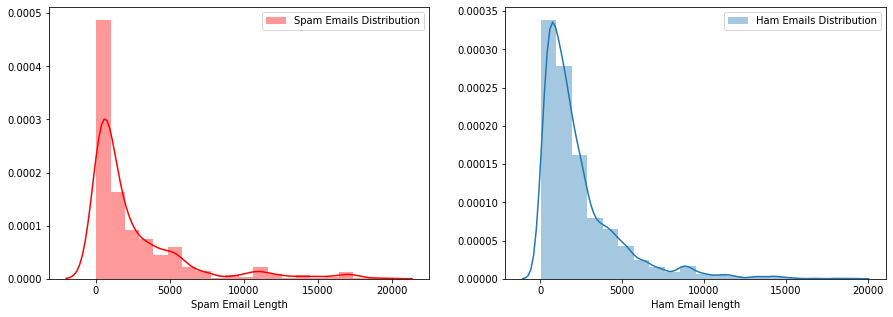

In [17]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,5))
sns.distplot(email[email['label']==1]['new_length'], bins=20, ax=ax[0], label='Spam Emails Distribution', color='r')
ax[0].set_xlabel('Spam Email Length')
ax[0].legend()

sns.distplot(email[email['label']==0]['new_length'], bins=20, ax=ax[1], label='Ham Emails Distribution')
ax[1].set_xlabel('Ham Email length')
ax[1].legend()

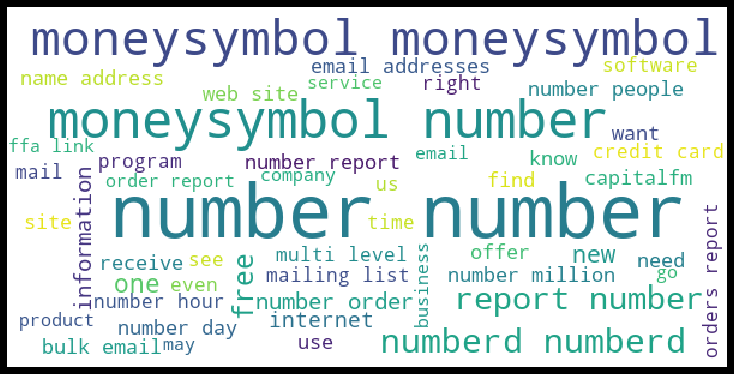

In [18]:
# !pip install wordcloud
# Create Word Cloud for Spam words
from wordcloud import WordCloud
spams = email[email['label']==1]['text']
spam_cloud = WordCloud(width=600, height=300, background_color='white', max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,5),facecolor='black')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

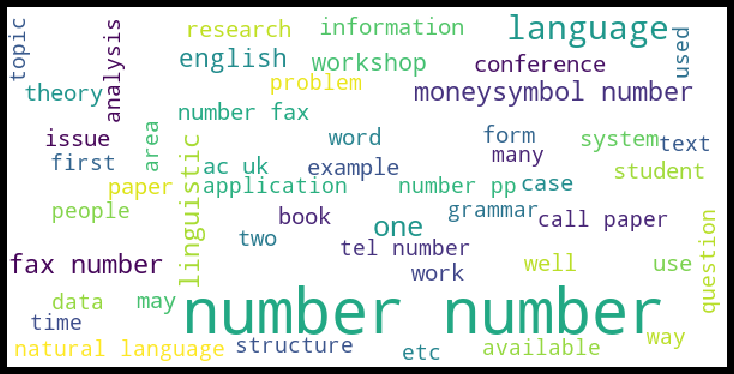

In [19]:
# Create Word Cloud for Ham words
from wordcloud import WordCloud
spams = email[email['label']==0]['text']
spam_cloud = WordCloud(width=600, height=300, background_color='white', max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,5),facecolor='black')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [20]:
# Text Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, plot_confusion_matrix

# ML Algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [21]:
tf_vec = TfidfVectorizer()

x = tf_vec.fit_transform(email['text'])
y = email['label']

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('x_train.shape: ',x_train.shape,
      'x_test.shape:',x_test.shape,
      '\ny_train.shape:',y_train.shape,
      'y_test.shape:',y_test.shape)

x_train.shape:  (2314, 55133) x_test.shape: (579, 55133) 
y_train.shape: (2314,) y_test.shape: (579,)


In [22]:
# Instantiate all models
logr = LogisticRegression()
mnb = MultinomialNB()
svc = SVC()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
xgb = XGBClassifier()
rf = RandomForestClassifier()
bgc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()

In [23]:
models={'Logistic Regression':logr,
        'Multinomial NB':mnb,
        'Support Vector Machine':svc,
        'KNeighbors Classifier':knn,
        'Decision Tree Classifier':dtc,
        'XGB Classifier':xgb,
        'Random Forest Classifier':rf,
        'Bagging Classifier':bgc,
        'Extra Trees Classifier':etc,
        'Gradient Boosting Classifier':gbc
       }

In [24]:
def main(cls):
    a_scores, specificity = [], []
    for model_name,model in cls.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        score = accuracy_score(y_test, y_pred)
        a_scores.append(score*100)
        print('##############################', model_name, '##############################')
        print('>>> Accuracy Score = %0.2f' %(score*100))
        c_matrix = confusion_matrix(y_test, y_pred)
        print('>>> Confusion Matrix: \n', c_matrix)
        TN, FP, FN, TP = c_matrix[0,0], c_matrix[0,1], c_matrix[1,0], c_matrix[1,1]
        print('>>> Recall Score = %0.2f' %((TP)*100/float(TP+FN)))
        print('>>> Specificity = %0.2f' %(TN*100/float(TN+FP)))
        specificity.append(TN*100/float(TN+FP))
        print('>>> False Positive Rate = %0.2f' %(FP*100/float(FP+TN)))
        print('>>> Precision Score = %0.2f' %(TP*100/float(TP+FP)))
        print('>>> Classification Report:')
        print(classification_report(y_test, y_pred))
    return a_scores, specificity

In [25]:
a_scores, specificity = main(models)

############################## Logistic Regression ##############################
>>> Accuracy Score = 95.16
>>> Confusion Matrix: 
 [[463   1]
 [ 27  88]]
>>> Recall Score = 76.52
>>> Specificity = 99.78
>>> False Positive Rate = 0.22
>>> Precision Score = 98.88
>>> Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       464
           1       0.99      0.77      0.86       115

    accuracy                           0.95       579
   macro avg       0.97      0.88      0.92       579
weighted avg       0.95      0.95      0.95       579

############################## Multinomial NB ##############################
>>> Accuracy Score = 82.90
>>> Confusion Matrix: 
 [[464   0]
 [ 99  16]]
>>> Recall Score = 13.91
>>> Specificity = 100.00
>>> False Positive Rate = 0.00
>>> Precision Score = 100.00
>>> Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      

In [27]:
p=pd.DataFrame(data=[a_scores,specificity],index=['Accuracy Score','Specificity'],columns=list(models.keys())).T.sort_values(by='Specificity',ascending=False)
print(p)

                              Accuracy Score  Specificity
Multinomial NB                     82.901554   100.000000
Random Forest Classifier           97.582038   100.000000
Extra Trees Classifier             97.236615   100.000000
Logistic Regression                95.164076    99.784483
Support Vector Machine             97.409326    99.784483
XGB Classifier                     98.791019    99.784483
Bagging Classifier                 96.891192    99.353448
Gradient Boosting Classifier       97.409326    99.353448
Decision Tree Classifier           95.854922    98.491379
KNeighbors Classifier              97.063903    97.844828


In [28]:
new_models={'Multinomial NB':mnb,
            'Random Forest Classifier':rf,
            'Extra Trees Classifier':etc
           }

In [29]:
cv_scores=[]
for model_name,model in new_models.items():
    score=cross_val_score(model, x_train, y_train, scoring='accuracy', cv=10)
    cv_scores.append((score.mean())*100)
    print(model_name,' >>> Completed >>> ', (score.mean())*100)

Multinomial NB  >>> Completed >>>  85.78239289446185
Random Forest Classifier  >>> Completed >>>  97.32068219137184
Extra Trees Classifier  >>> Completed >>>  96.97473503507986


In [30]:
pd.DataFrame(data=cv_scores, columns=['New Accuracy Score'], index=list(new_models.keys())).join(p)

,New Accuracy Score,Accuracy Score,Specificity
Multinomial NB,85.782393,82.901554,100.0
Random Forest Classifier,97.320682,97.582038,100.0
Extra Trees Classifier,96.974735,97.236615,100.0


Multinomial is performing better than other classifiers for Spam Classification.

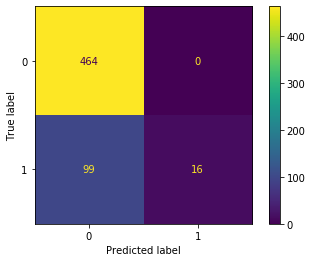

In [31]:
# Plotting Confusion Matrix
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)
plot_confusion_matrix(mnb, x_test, y_test)

In [32]:
confusion_matrix(y_test, y_pred)

array([[464,   0],
       [ 99,  16]], dtype=int64)

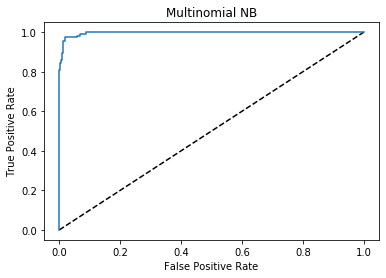

In [33]:
# Plotting ROC Curve for the model
y_pred_prob = mnb.predict_proba(x_test)[:,1]  #1 is the probabilty of threshold value
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Multinomial NB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multinomial NB')
plt.show()